# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [18]:
sat_csv = "/Users/chelen/Documents/ga/wk2/project-1/data/sat.csv"
act_csv = "/Users/chelen/Documents/ga/wk2/project-1/data/act.csv"

import pandas as pd
sat = pd.read_csv(sat_csv)
act = pd.read_csv(act_csv)
print(sat)
print(act)

#if we wanted to extract a variable in csv:
    #salary = ath['Total Pay'].values.tolist()

    Unnamed: 0                 State Participation  \
0            0               Alabama            5%   
1            1                Alaska           38%   
2            2               Arizona           30%   
3            3              Arkansas            3%   
4            4            California           53%   
5            5              Colorado           11%   
6            6           Connecticut          100%   
7            7              Delaware          100%   
8            8  District of Columbia          100%   
9            9               Florida           83%   
10          10               Georgia           61%   
11          11                Hawaii           55%   
12          12                 Idaho           93%   
13          13              Illinois            9%   
14          14               Indiana           63%   
15          15                  Iowa            2%   
16          16                Kansas            4%   
17          17              

##### 2. Print the first ten rows of each dataframe.

In [19]:
sat_df =pd.DataFrame(sat)
act_df =pd.DataFrame(act)
print(sat_df[:10])
print(act_df[:10])

   Unnamed: 0                 State Participation  \
0           0               Alabama            5%   
1           1                Alaska           38%   
2           2               Arizona           30%   
3           3              Arkansas            3%   
4           4            California           53%   
5           5              Colorado           11%   
6           6           Connecticut          100%   
7           7              Delaware          100%   
8           8  District of Columbia          100%   
9           9               Florida           83%   

   Evidence-Based Reading and Writing  Math  Total  
0                                 593   572   1165  
1                                 547   533   1080  
2                                 563   553   1116  
3                                 614   594   1208  
4                                 531   524   1055  
5                                 606   595   1201  
6                                 530   512  

##### 3. Describe in words what each variable (column) is.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

##### 5. Print the types of each column.

In [20]:
print(sat_df.dtypes)
print()
print(act_df.dtypes)

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [21]:
#print(sat_df.dtypes)
    #should Unnamed be an int64? no
    #should State be a string? yes
    #should Participation be a string? no
    #should EBRW be an int64? yes
    #should Math be an int64? yes
    #should Total be an int64? yes

#fix Unnamed dtype
sat['Unnamed: 0'] = sat['Unnamed: 0'].astype('str')

#fix Participation dtype
#sat_df['Participation'].apply(lambda x: x.replace('%', '')).astype('float')/100
sat_df['Participation'] = [float(x.replace('%', ''))/100 for x in sat_df['Participation']]

#QUESTION: Why do we need to set sat_df[<variable>].astype(<type>) here back to itself in order to save the new dtype?
sat_df['Participation'] = sat_df['Participation'].astype('float64')
print(sat_df.dtypes)

Unnamed: 0                             object
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


In [22]:
#print(act_df.dtypes)
    #should Unnamed be an int64? no
    #should State be a str? yes
    #should Participation be an object? no
    #should English be a float64? yes
    #should Math be a float64? yes
    #should Reading be a float64? yes
    #should Science be a float64? yes
    #should Composite be a float64? yes

#fix Unnamed dtype
act['Unnamed: 0'] = act['Unnamed: 0'].astype('str')

#fix Participation dtype
act['Participation'] = [float(x.replace('%', ''))/100 for x in act_df['Participation']]
act['Participation'] = act['Participation'].astype('float64')
print(act_df.dtypes)

Unnamed: 0        object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [23]:
#sat
    #ebrw_dict = { 'State': ebrw_score, ...}
    #math_dict
    #total_dict

#QUESTION: why can we denote a variable by sat_df[<variable>] and sat_df.variable?
    #what is dict(zip(...)) doing?
    #test = dict(zip('1', '2'))
ebrw_dict = dict(zip(sat_df['State'], sat_df['Evidence-Based Reading and Writing']))
math_dict = dict(zip(sat_df['State'], sat_df['Math']))
total_dict = dict(zip(sat_df['State'], sat_df['Total']))

#ebrw_dict = sat_df.set_index('State')['Evidence-Based Reading and Writing'].to_dict()
#math_dict = sat_df.set_index('State')['Math'].to_dict()
#total_dict = sat_df.set_index('State')['Total'].to_dict()

display(ebrw_dict)
display(math_dict)
display(total_dict)

{'Alabama': 593,
 'Alaska': 547,
 'Arizona': 563,
 'Arkansas': 614,
 'California': 531,
 'Colorado': 606,
 'Connecticut': 530,
 'Delaware': 503,
 'District of Columbia': 482,
 'Florida': 520,
 'Georgia': 535,
 'Hawaii': 544,
 'Idaho': 513,
 'Illinois': 559,
 'Indiana': 542,
 'Iowa': 641,
 'Kansas': 632,
 'Kentucky': 631,
 'Louisiana': 611,
 'Maine': 513,
 'Maryland': 536,
 'Massachusetts': 555,
 'Michigan': 509,
 'Minnesota': 644,
 'Mississippi': 634,
 'Missouri': 640,
 'Montana': 605,
 'Nebraska': 629,
 'Nevada': 563,
 'New Hampshire': 532,
 'New Jersey': 530,
 'New Mexico': 577,
 'New York': 528,
 'North Carolina': 546,
 'North Dakota': 635,
 'Ohio': 578,
 'Oklahoma': 530,
 'Oregon': 560,
 'Pennsylvania': 540,
 'Rhode Island': 539,
 'South Carolina': 543,
 'South Dakota': 612,
 'Tennessee': 623,
 'Texas': 513,
 'Utah': 624,
 'Vermont': 562,
 'Virginia': 561,
 'Washington': 541,
 'West Virginia': 558,
 'Wisconsin': 642,
 'Wyoming': 626}

{'Alabama': 572,
 'Alaska': 533,
 'Arizona': 553,
 'Arkansas': 594,
 'California': 524,
 'Colorado': 595,
 'Connecticut': 512,
 'Delaware': 492,
 'District of Columbia': 468,
 'Florida': 497,
 'Georgia': 515,
 'Hawaii': 541,
 'Idaho': 493,
 'Illinois': 556,
 'Indiana': 532,
 'Iowa': 635,
 'Kansas': 628,
 'Kentucky': 616,
 'Louisiana': 586,
 'Maine': 499,
 'Maryland': 52,
 'Massachusetts': 551,
 'Michigan': 495,
 'Minnesota': 651,
 'Mississippi': 607,
 'Missouri': 631,
 'Montana': 591,
 'Nebraska': 625,
 'Nevada': 553,
 'New Hampshire': 520,
 'New Jersey': 526,
 'New Mexico': 561,
 'New York': 523,
 'North Carolina': 535,
 'North Dakota': 621,
 'Ohio': 570,
 'Oklahoma': 517,
 'Oregon': 548,
 'Pennsylvania': 531,
 'Rhode Island': 524,
 'South Carolina': 521,
 'South Dakota': 603,
 'Tennessee': 604,
 'Texas': 507,
 'Utah': 614,
 'Vermont': 551,
 'Virginia': 541,
 'Washington': 534,
 'West Virginia': 528,
 'Wisconsin': 649,
 'Wyoming': 604}

{'Alabama': 1165,
 'Alaska': 1080,
 'Arizona': 1116,
 'Arkansas': 1208,
 'California': 1055,
 'Colorado': 1201,
 'Connecticut': 1041,
 'Delaware': 996,
 'District of Columbia': 950,
 'Florida': 1017,
 'Georgia': 1050,
 'Hawaii': 1085,
 'Idaho': 1005,
 'Illinois': 1115,
 'Indiana': 1074,
 'Iowa': 1275,
 'Kansas': 1260,
 'Kentucky': 1247,
 'Louisiana': 1198,
 'Maine': 1012,
 'Maryland': 1060,
 'Massachusetts': 1107,
 'Michigan': 1005,
 'Minnesota': 1295,
 'Mississippi': 1242,
 'Missouri': 1271,
 'Montana': 1196,
 'Nebraska': 1253,
 'Nevada': 1116,
 'New Hampshire': 1052,
 'New Jersey': 1056,
 'New Mexico': 1138,
 'New York': 1052,
 'North Carolina': 1081,
 'North Dakota': 1256,
 'Ohio': 1149,
 'Oklahoma': 1047,
 'Oregon': 1108,
 'Pennsylvania': 1071,
 'Rhode Island': 1062,
 'South Carolina': 1064,
 'South Dakota': 1216,
 'Tennessee': 1228,
 'Texas': 1020,
 'Utah': 1238,
 'Vermont': 1114,
 'Virginia': 1102,
 'Washington': 1075,
 'West Virginia': 1086,
 'Wisconsin': 1291,
 'Wyoming': 1230}

In [24]:
#act
    #eng_dict = { 'State': ebrw_score, ...}
    #mathact_dict
    #reading_dict
    #science_dict
    #composite_dict

eng_dict = dict(zip(act_df['State'], act_df['English']))
mathact_dict = dict(zip(act_df['State'], act_df['Math']))
reading_dict = dict(zip(act_df['State'], act_df['Reading']))
science_dict = dict(zip(act_df['State'], act_df['Science']))
composite_dict = dict(zip(act_df['State'], act_df['Composite']))

display(composite_dict)

{'National': 21.0,
 'Alabama': 19.2,
 'Alaska': 19.8,
 'Arizona': 19.7,
 'Arkansas': 19.4,
 'California': 22.8,
 'Colorado': 20.8,
 'Connecticut': 25.2,
 'Delaware': 24.1,
 'District of Columbia': 24.2,
 'Florida': 19.8,
 'Georgia': 21.4,
 'Hawaii': 19.0,
 'Idaho': 22.3,
 'Illinois': 21.4,
 'Indiana': 22.6,
 'Iowa': 21.9,
 'Kansas': 21.7,
 'Kentucky': 20.0,
 'Louisiana': 19.5,
 'Maine': 24.3,
 'Maryland': 23.6,
 'Massachusetts': 25.4,
 'Michigan': 24.1,
 'Minnesota': 21.5,
 'Mississippi': 18.6,
 'Missouri': 20.4,
 'Montana': 20.3,
 'Nebraska': 21.4,
 'Nevada': 17.8,
 'New Hampshire': 25.5,
 'New Jersey': 23.9,
 'New Mexico': 19.7,
 'New York': 24.2,
 'North Carolina': 19.1,
 'North Dakota': 20.3,
 'Ohio': 22.0,
 'Oklahoma': 19.4,
 'Oregon': 21.8,
 'Pennsylvania': 23.7,
 'Rhode Island': 24.0,
 'South Carolina': 18.7,
 'South Dakota': 21.8,
 'Tennessee': 19.8,
 'Texas': 20.7,
 'Utah': 20.3,
 'Vermont': 23.6,
 'Virginia': 23.8,
 'Washington': 21.9,
 'West Virginia': 20.4,
 'Wisconsin': 20

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [25]:
#one_dict = { column_name: list of all column values }
    #one_dict = { [ebrw] : [ebrw_scores], [math] : [math_scores]... }
        
one_dict = {'ebrw': list(sat_df['Evidence-Based Reading and Writing']),
            'math': list(sat_df['Math']),
            'total': list(sat_df['Total']),
            'english': list(act_df['English']),
            'mathact': list(act_df['Math']),
            'reading': list(act_df['Reading']),
            'science': list(act_df['Science']),
            'composite': list(act_df['Composite'])
           }
#returns 51 b/c includes National average row
    #print(len(list(sat_df['Evidence-Based Reading and Writing'])))
display(one_dict.keys())

dict_keys(['ebrw', 'math', 'total', 'english', 'mathact', 'reading', 'science', 'composite'])

##### 9. Merge the dataframes on the state column.

In [26]:
merged_df =pd.merge(sat_df, act_df, on='State')
display(merged_df.head(n=1))

,Unnamed: 0_x,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Unnamed: 0_y,Participation_y,English,Math_y,Reading,Science,Composite
0,0,Alabama,0.05,593,572,1165,1,1.0,18.9,18.4,19.7,19.4,19.2


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [27]:
merged_df.columns = ['unnamed0_sat',
                     'state',
                     'participation_sat',
                     'ebrw_sat',
                     'math_sat', 
                     'total_sat', 
                     'unnamed0_act',
                     'participation_act', 
                     'english_act', 
                     'math_act',
                     'reading_act',
                     'science_act',
                     'composite_act']
display(merged_df)
#below works for replacing column values, not columns themselves
    #merged_df.replace('Test', 'Alabama')

,unnamed0_sat,state,participation_sat,ebrw_sat,math_sat,total_sat,unnamed0_act,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,0,Alabama,0.05,593,572,1165,1,1.00,18.9,18.4,19.7,19.4,19.2
1,1,Alaska,0.38,547,533,1080,2,0.65,18.7,19.8,20.4,19.9,19.8
2,2,Arizona,0.30,563,553,1116,3,0.62,18.6,19.8,20.1,19.8,19.7
3,3,Arkansas,0.03,614,594,1208,4,1.00,18.9,19.0,19.7,19.5,19.4
4,4,California,0.53,531,524,1055,5,0.31,22.5,22.7,23.1,22.2,22.8
5,5,Colorado,0.11,606,595,1201,6,1.00,20.1,20.3,21.2,20.9,20.8
6,6,Connecticut,1.00,530,512,1041,7,0.31,25.5,24.6,25.6,24.6,25.2
7,7,Delaware,1.00,503,492,996,8,0.18,24.1,23.4,24.8,23.6,24.1
8,8,District of Columbia,1.00,482,468,950,9,0.32,24.4,23.5,24.9,23.5,24.2
9,9,Florida,0.83,520,497,1017,10,0.73,19.0,19.4,21.0,19.4,19.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [28]:
merged_df.columns

Index(['unnamed0_sat', 'state', 'participation_sat', 'ebrw_sat', 'math_sat',
       'total_sat', 'unnamed0_act', 'participation_act', 'english_act',
       'math_act', 'reading_act', 'science_act', 'composite_act'],
      dtype='object')

In [29]:
merged_df['math_act'].dtypes

dtype('float64')

In [30]:
merged_numeric_df = merged_df.select_dtypes(include = ('float64', 'int64'))
print('numeric_columns_max: \n', merged_numeric_df.max())
print()
print('numeric_columns_min: \n', merged_numeric_df.min())
 
#QUESTION: can you use a for loop to iterate through the merged_df column names and check for that column's data type?
#for i in merged_df.columns:
    #print (i, i.dtypes)
    #if type(merged_df[i]) == 'float64': #or type(i) == 'int64':
        #print ('numeric_column_max:' + merged_df.max())
        #print ('numeric_column_min:' + merged_df.min())
    #else:
        #print ('not a numeric_column')

numeric_columns_max: 
 participation_sat       1.0
ebrw_sat              644.0
math_sat              651.0
total_sat            1295.0
participation_act       1.0
english_act            25.5
math_act               25.3
reading_act            26.0
science_act            24.9
composite_act          25.5
dtype: float64

numeric_columns_min: 
 participation_sat      0.02
ebrw_sat             482.00
math_sat              52.00
total_sat            950.00
participation_act      0.08
english_act           16.30
math_act              18.00
reading_act           18.10
science_act            2.30
composite_act         17.80
dtype: float64


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [31]:
display(merged_numeric_df)

,participation_sat,ebrw_sat,math_sat,total_sat,participation_act,english_act,math_act,reading_act,science_act,composite_act
0,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
5,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
6,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
7,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
8,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
9,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


In [32]:
import numpy as np
#np.mean(merged_numeric_df['participation_sat'].values)
#merged_numeric_df.iloc[:3,0:1]
#display(one_dict.keys())

sd = []
for test in merged_numeric_df:
    score_mean = np.mean(merged_numeric_df[test])
    score = (merged_numeric_df[test])
    #subtracting 1 below because otherwise n counts header as a row
    n = len(merged_numeric_df[test]) - 1
    std = np.sqrt((sum((score - score_mean)**2) / n))
    #originally TypeError: 'builtin_function_or_method' object is not subscriptable b/c I was using [] instead of ()
        #was not calling the function the right way
    sd.append(std)
    #print(test, score_mean, std)
    #QUESTION: why SyntaxError: 'return' outside function here?
    
sd
    #QUESTION: when did I get rid of National row in act_df?^


[0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.1824629751554525,
 2.020694891154341]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [33]:
sd
merged_numeric_df.loc[51] = pd.DataFrame(sd, columns = merged_numeric_df.columns)
#merged_numeric_df

ValueError: Shape of passed values is (1, 10), indices imply (10, 10)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [ ]:
merged_numeric_df.sort_values(['participation_sat'], ascending = False)

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [ ]:
mask = merged_numeric_df['participation_sat'] > 0.5
merged_numeric_df[mask]

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [ ]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8,4))

merged_numeric_df['participation_sat'].plot(kind = 'hist', ax = ax[0], title = 'participation: sat');
merged_numeric_df['participation_act'].plot(kind = 'hist', ax = ax[1], title = 'participation: act');

#QUESTION: why doesn't the below work? doesn't seem to take in ax / doesn't play well with subplots
#plt.hist(merged_numeric_df['participation_sat'], ax[0]);
#plt.hist(merged_numeric_df['participation_act'], title = 'participation: act');

plt.tight_layout()

##### 17. Plot the Math(s) distributions from both data sets.

In [ ]:
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8,4))

merged_numeric_df['math_sat'].plot(kind = 'hist', ax = ax[0], title = 'math: sat');
merged_numeric_df['math_act'].plot(kind = 'hist', ax = ax[1], title = 'math: act');

plt.tight_layout()

##### 18. Plot the Verbal distributions from both data sets.

In [ ]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

merged_numeric_df['ebrw_sat'].plot(kind = 'hist', ax = ax[0], title = 'ebrw: sat');
merged_numeric_df['reading_act'].plot(kind = 'hist', ax = ax[1], title = 'reading: act');

plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [ ]:
merged_numeric_df.columns

Underlying assumption: our population data is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

In [ ]:
#Our data does not appear to be normally distributed looking at the plots.
figure, ax = plt.subplots(nrows = 2, ncols = 6, figsize = (25,8))

merged_numeric_df['participation_sat'].plot(kind = 'hist', ax = ax[0,0], title = 'participation_sat');
merged_numeric_df['ebrw_sat'].plot(kind = 'hist', ax = ax[0,1], title = 'ebrw_sat');
merged_numeric_df['math_sat'].plot(kind = 'hist', ax = ax[0,2], title = 'math_sat');
merged_numeric_df['total_sat'].plot(kind = 'hist', ax = ax[0,3], title = 'total_sat');
merged_numeric_df['participation_act'].plot(kind = 'hist', ax = ax[1,0], title = 'participation_act');
merged_numeric_df['english_act'].plot(kind = 'hist', ax = ax[1,1], title = 'participation_sat');
merged_numeric_df['math_act'].plot(kind = 'hist', ax = ax[1,2], title = 'math_act');
merged_numeric_df['reading_act'].plot(kind = 'hist', ax = ax[1,3], title = 'reading_act');
merged_numeric_df['science_act'].plot(kind = 'hist', ax = ax[1,4], title = 'science_act');
merged_numeric_df['composite_act'].plot(kind = 'hist', ax = ax[1,5], title = 'composite_act');

plt.tight_layout()

##### 21. Plot some scatterplots examining relationships between all variables.

In [ ]:
figure, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16,12))

merged_numeric_df.plot.scatter('ebrw_sat','math_sat', ax = ax[0,0]);
merged_numeric_df.plot.scatter('ebrw_sat','total_sat', ax = ax[0,1]);
merged_numeric_df.plot.scatter('participation_sat','total_sat', ax = ax[0,2]);

merged_numeric_df.plot.scatter('reading_act','english_act', ax = ax[1,0]);
merged_numeric_df.plot.scatter('reading_act', 'science_act', ax = ax[1,1]);
merged_numeric_df.plot.scatter('participation_act','composite_act', ax = ax[1,2]);

##### 22. Are there any interesting relationships to note?

The participation rates tend to be lower for the highest total SAT / composite ACT scores. This may point to (self) selection bias: those who sign up to take the tests are high performing students.

##### 23. Create box plots for each variable. 

see above in 20)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

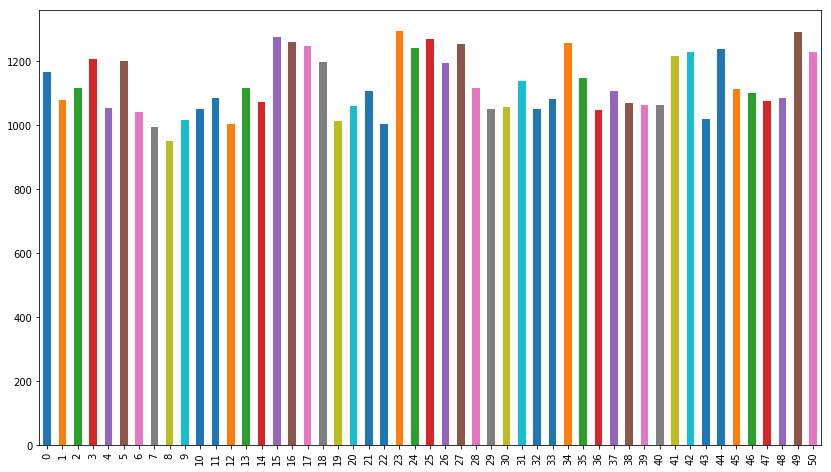

In [86]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
#shape, center, spread
merged_numeric_df.apply([np.mean, np.median, np.std], axis=0).T
for i in merged_numeric_df.columns:
    display(merged_numeric_df[i].plot(kind='bar', figsize = (14,8)))
#plt.bar(merged_numeric_df.columns, merged_numeric_df.isnull().sum());

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [87]:
#alpha = 0.05
#how to formulate hypothesis? 
#null hypothesis: There is no difference between the two test rates: mu = 0.
#altnerate hypothesis: The average participation rate of SAT testing is different than ACT rate.


0.3980392156862746

In [124]:
#mu we are setting to be the null hypothetical difference between SAT and ACT participation rates
mu = 0

In [160]:
#calculate your test statistic...
    #test statistic: z-score = (sample_statistic - mu) / (std / (sqrt(n)))
z_scores = []
for i in merged_df['state']:
    sample_statistic = (merged_df['participation_sat']) - (merged_df['participation_act'])
    mu = 0
    std = np.std(sample_statistic)
    n = len(merged_df['state'])
    z = (sample_statistic - mu) / (std / (np.sqrt(n)))
    z_scores.append(z)

#z_scores

In [165]:
merged_df['z']=pd.DataFrame(z_scores[0])
merged_df['z'] 

0    -10.591470
1     -3.010207
2     -3.567653
3    -10.814448
4      2.452762
5     -9.922535
6      7.692752
7      9.142111
8      7.581263
9      1.114892
10     0.668935
11    -3.902121
12     6.131904
13    -9.365089
14     3.121696
15    -7.246795
16    -7.692752
17   -10.702959
18   -10.702959
19     9.699557
20     4.571056
21     5.239990
22     7.915730
23   -10.814448
24   -10.925938
25   -10.814448
26   -10.034024
27    -9.030622
28    -8.250198
29     8.696154
30     4.013610
31    -6.131904
32     4.013610
33    -5.685947
34   -10.702959
35    -7.023817
36   -10.368492
37     0.334467
38     4.682545
39     5.574458
40    -5.574458
41    -8.584665
42   -10.591470
43     1.895316
44   -10.814448
45     3.456164
46     4.013610
47     3.902121
48    -6.131904
49   -10.814448
50   -10.814448
Name: z, dtype: float64

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


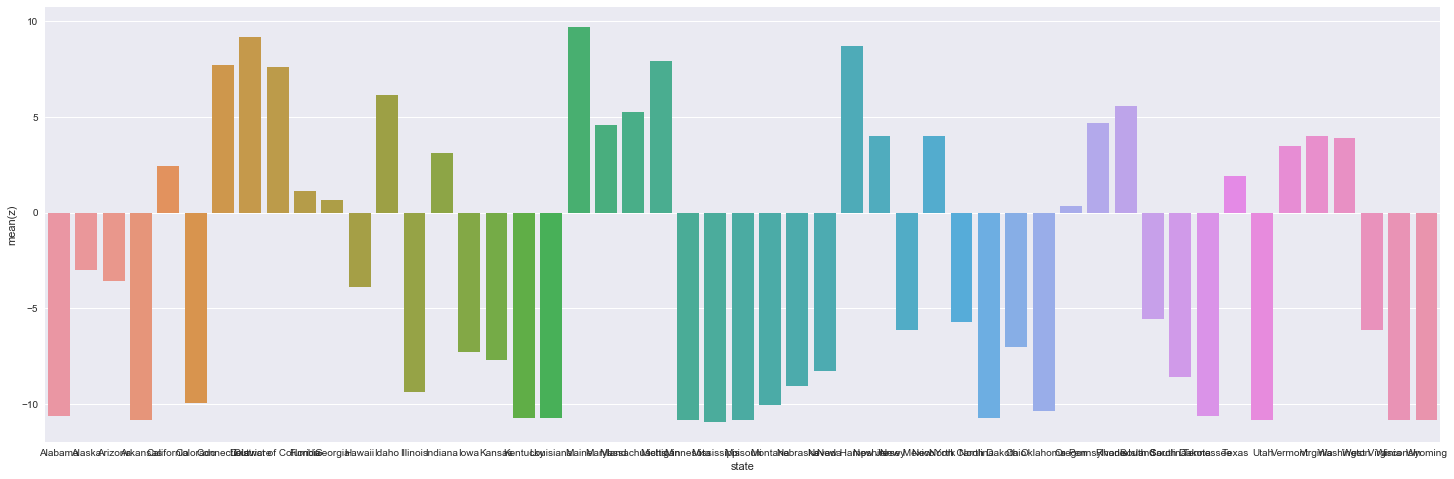

In [168]:
#plt.hist(merged_df['participation_sat'] - merged_df['participation_act']);
fig = plt.figure(figsize = (25,8))
sns.barplot(x=merged_df['state'], y=merged_df['z']);
#plt.hist(z_scores, bins = 20;

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


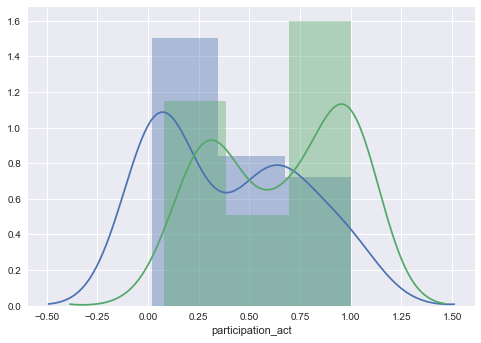

In [116]:
import seaborn as sns
sns.distplot(merged_numeric_df['participation_sat'], kde = True);
sns.distplot(merged_numeric_df['participation_act'], kde = True);

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [123]:
#formula: sample_mean +/- z_score * (std / sqrt(n))
z_score = stats.norm.ppf(0.95)
sample_mean = sample_statistic
high_end = sample_mean + z_score * (std / np.sqrt(n))
low_end = sample_mean - z_score * (std / np.sqrt(n))
print('The 95% CI for the difference between SAT and ACT participation rates is: ', low_end, ',', high_end)



The 95% CI for the difference between SAT and ACT participation rates is:  0.31758863172896445 , 0.47848979964358473


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?